In [1]:
import pandas as pd 
import numpy as np 
import joblib
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df=pd.read_csv('Indian_Kids_Screen_Time.csv')
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [4]:
df.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [5]:
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [6]:
df['Health_Impacts'].unique()

array(['Poor Sleep, Eye Strain', 'Poor Sleep', nan, 'Poor Sleep, Anxiety',
       'Poor Sleep, Obesity Risk', 'Eye Strain', 'Obesity Risk',
       'Anxiety', 'Poor Sleep, Anxiety, Obesity Risk',
       'Eye Strain, Obesity Risk', 'Eye Strain, Anxiety, Obesity Risk',
       'Anxiety, Obesity Risk', 'Poor Sleep, Eye Strain, Obesity Risk',
       'Poor Sleep, Eye Strain, Anxiety',
       'Poor Sleep, Eye Strain, Anxiety, Obesity Risk',
       'Eye Strain, Anxiety'], dtype=object)

<Axes: xlabel='Gender', ylabel='count'>

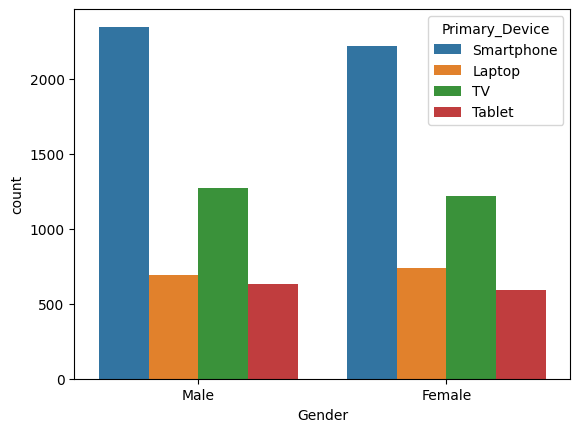

In [7]:
sns.countplot(df,x=df['Gender'],hue=df['Primary_Device'])

In [8]:
df['Urban_or_Rural']=pd.get_dummies(df['Urban_or_Rural'],drop_first=True,dtype=int)

<Axes: xlabel='Urban_or_Rural', ylabel='count'>

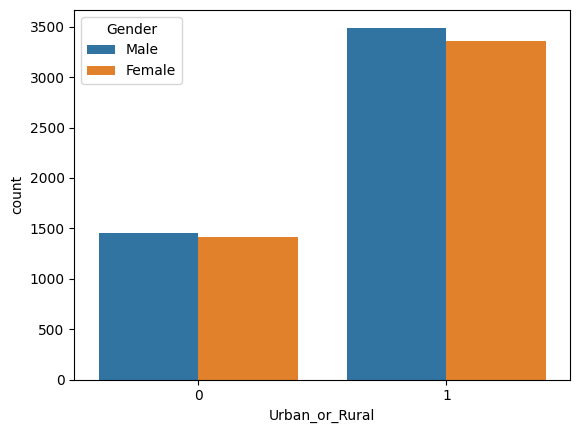

In [9]:
sns.countplot(data=df,x=df['Urban_or_Rural'],hue=df['Gender'])

<Axes: xlabel='Urban_or_Rural', ylabel='count'>

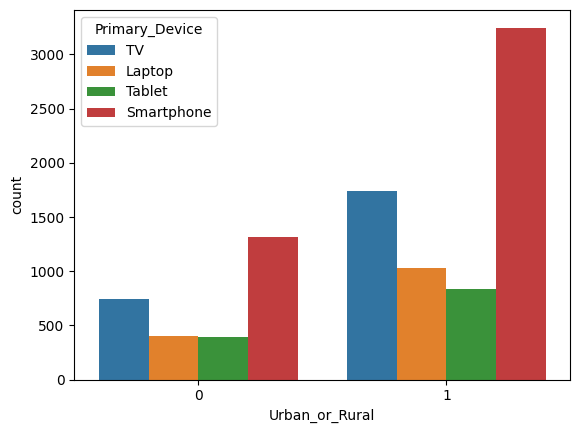

In [10]:
sns.countplot(data=df,x=df['Urban_or_Rural'],hue=df['Primary_Device'])

C:\Users\91800\AppData\Local\Temp\ipykernel_13132\3790411793.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df,x=df['Age'],y=df['Avg_Daily_Screen_Time_hr'],ci=None)


<Axes: xlabel='Age', ylabel='Avg_Daily_Screen_Time_hr'>

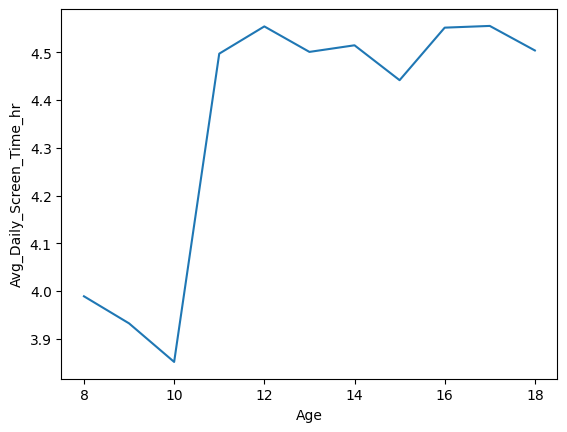

In [11]:
sns.lineplot(data=df,x=df['Age'],y=df['Avg_Daily_Screen_Time_hr'],ci=None)

<Axes: xlabel='Age', ylabel='Educational_to_Recreational_Ratio'>

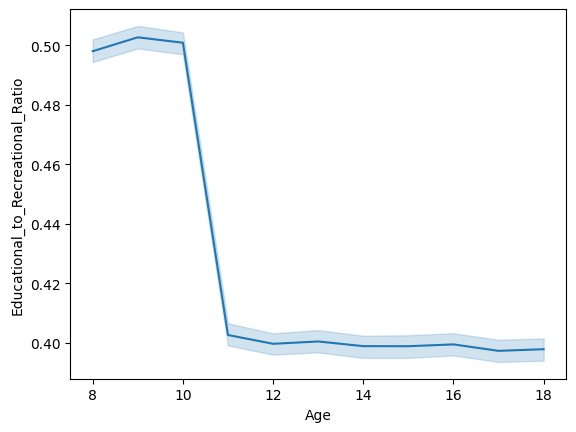

In [12]:
sns.lineplot(data=df,x=df['Age'],y=df['Educational_to_Recreational_Ratio'])

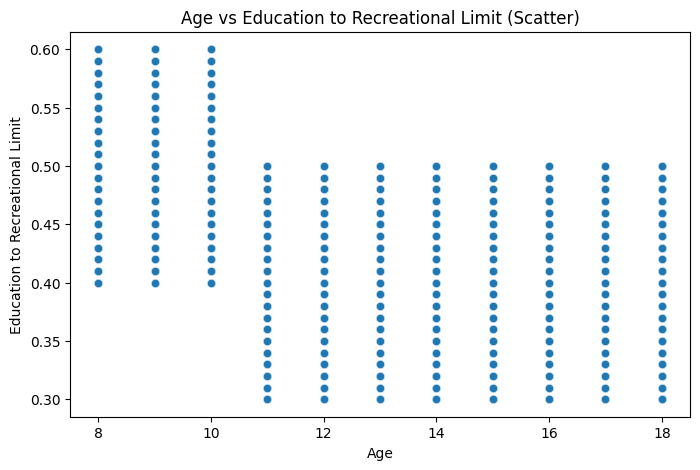

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Age'], y=df['Educational_to_Recreational_Ratio'], data=df, alpha=0.6)
plt.title('Age vs Education to Recreational Limit (Scatter)')
plt.xlabel('Age')
plt.ylabel('Education to Recreational Limit')
plt.show()

<Axes: >

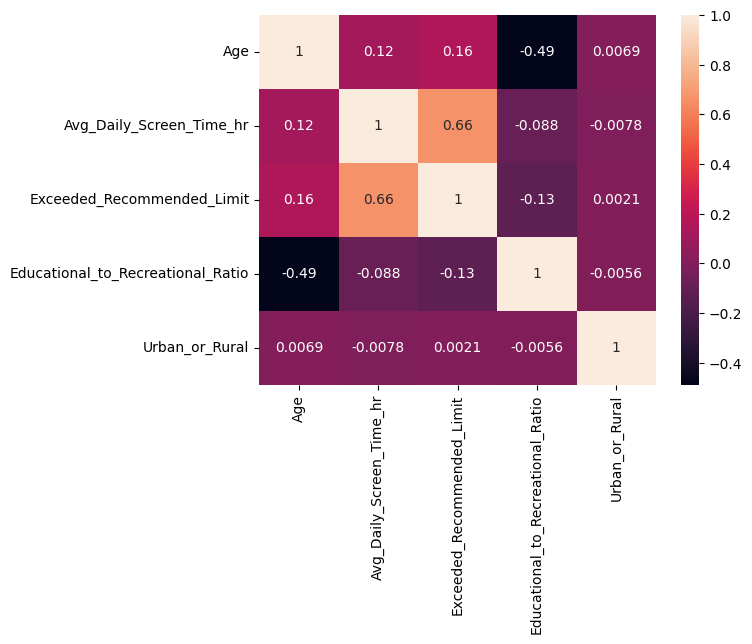

In [14]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

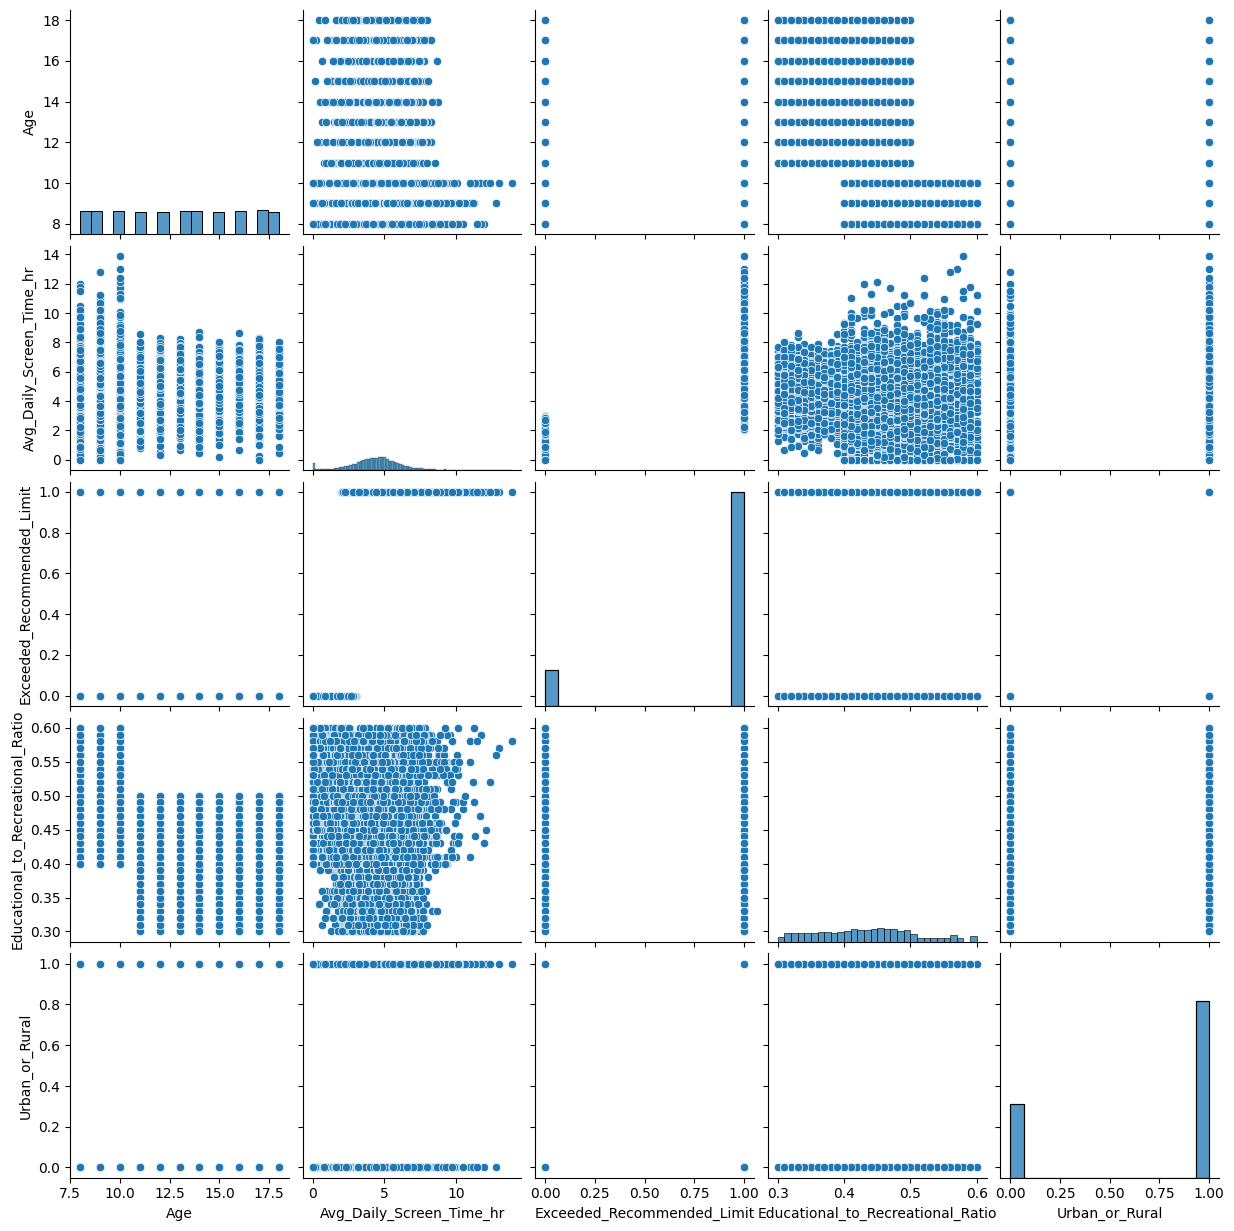

In [15]:
sns.pairplot(df)

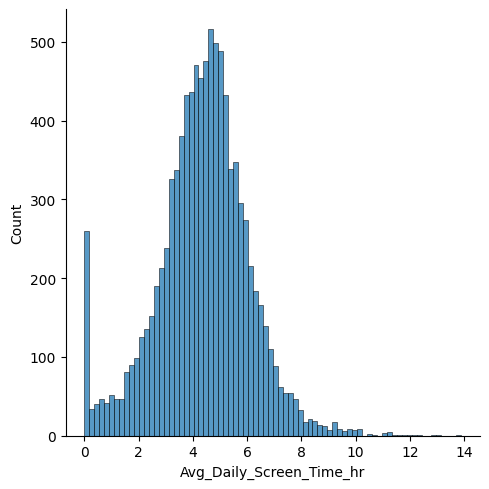

In [16]:
# SO here i check the distributon plot  for the screen time beacuse to get the basic idea that what is teh exact distibtuion of peopl using teh phone on avg
sns.displot(df['Avg_Daily_Screen_Time_hr'])

<Axes: xlabel='Urban_or_Rural', ylabel='Avg_Daily_Screen_Time_hr'>

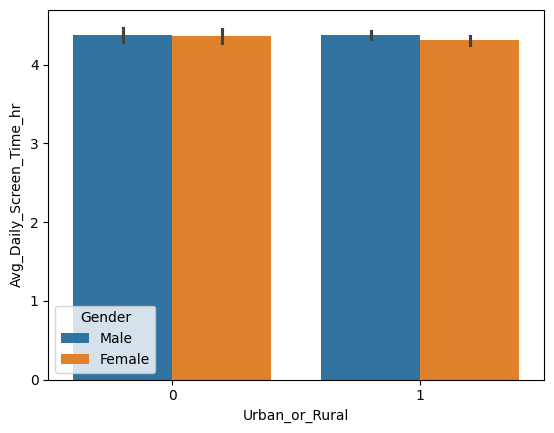

In [17]:
# SO here i wanted to check that how much is the diffreence in between the usage of the devices based upon there location and gender and we can see there is only slight diffrence between urban and rural 
sns.barplot(data=df,x=df['Urban_or_Rural'],y=df['Avg_Daily_Screen_Time_hr'],hue=df['Gender'])

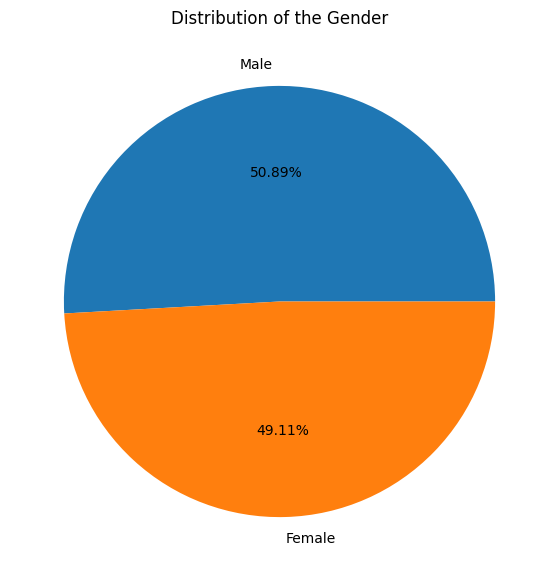

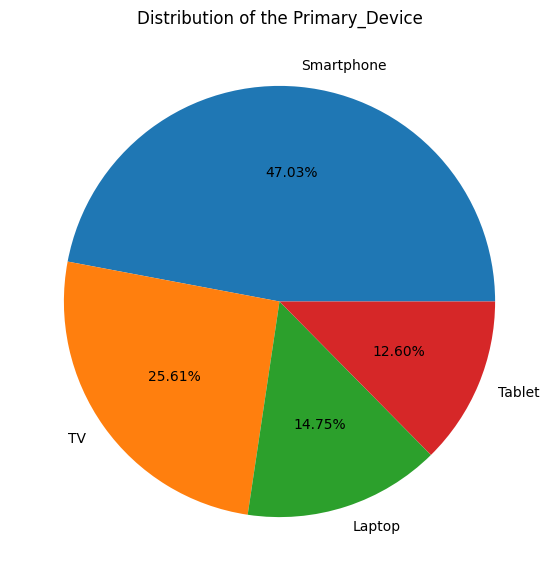

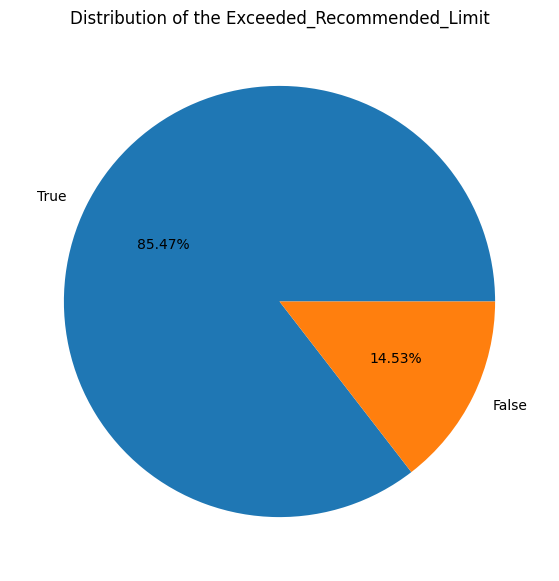

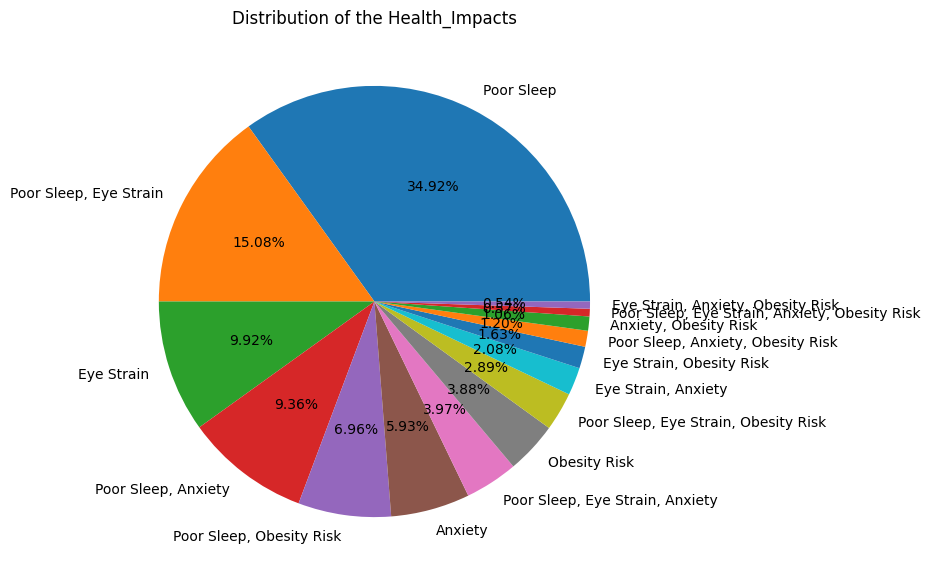

In [18]:
# Now again we have to get the basic idea of the ditribtion of the columns so that we can get the idea to evluate  what could be the possible reason  of facing issue
# We are going to check in the categorical columns so that we can get the basics idea that whether they distributed evenly or not 
cat_cols=df.select_dtypes(['object','bool'])

for col in cat_cols: 
    # SO here i am droping the null values instead of filling them cause i will get the raw and real idea what could be the missing values impact here and what are the distribution in this
    data=df[col].dropna()
    value_counts=data.value_counts()
    plt.figure(figsize=(8,7))
    plt.pie(value_counts,labels=value_counts.index,autopct="%1.2f%%")
    plt.title(f"Distribution of the {col}")
    plt.show()




# SO here we can get the basics idea that mostly people are using thr moblie here which is common cause in day to day life it is easy to carry and the second most impactful is tv which shows that stil kids are into too much of the tv
# Second conclusion here we can see that distribution betwen the Gender is quite similiar which is very good cause it will help the model to be not bias to partiucluar gender during fitting 
# Third conlusion here can conclude that most of the kids are using the phone in way high limit that is even aloud or using the electronic device
# Forth conclusion we can say that due to these problem most of the children face a a problem of Poor sleep and Eye strain 


In [19]:
# 💡 Feature Engineering Idea:
# While analyzing the plots, I thought of creating a ratio feature.
# By dividing avg_screentime_hr by education_to_recreation_limit,
# we can approximate whether someone exceeds the recommended screen-time.
# A threshold (e.g., > 0.5) may indicate crossing the healthy/recommended usage boundary.

df['screenEduRecExceedIndex']=df['Avg_Daily_Screen_Time_hr']/df['Educational_to_Recreational_Ratio']

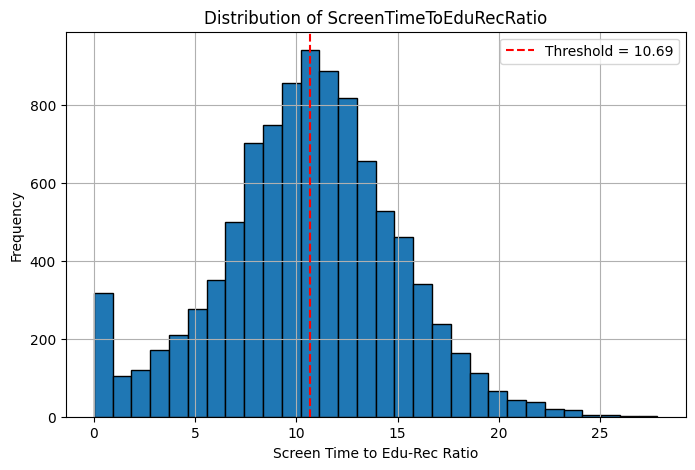

In [20]:
# First, I checked the distribution of the ScreenTimeToEduRecRatio column. 
# The data looked slightly skewed, and since the values were not properly scaled, 
# using a fixed threshold like 0.5 would not make sense here. 
# Therefore, I chose the median value (10.69) as the base threshold, 
# since the median is more robust to skewed distributions. 
# This threshold will help in classifying whether a child exceeds the recommended limit or not.


plt.figure(figsize=(8,5))
df['screenEduRecExceedIndex'].hist(bins=30, edgecolor='black')
threshold = df['screenEduRecExceedIndex'].median() 
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.2f}')
plt.xlabel("Screen Time to Edu-Rec Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of ScreenTimeToEduRecRatio")
plt.legend()
plt.show()

In [21]:
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,screenEduRecExceedIndex
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",1,9.500000
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,1,15.366667
2,18,Female,3.73,TV,True,0.32,Poor Sleep,1,11.656250
3,15,Female,1.21,Laptop,False,0.39,NaN,1,3.102564
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",1,12.020408
...,...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,1,7.409091
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,0,11.075000
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",0,14.410256
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,1,13.023256


In [22]:
df['Predicted_Exceed']=(df['screenEduRecExceedIndex']>10.69).astype(int)

In [23]:
# so here i wanted to check that what is the ratio of my guess of convernig the predicted exceed with orignal one 
comparison = (df['Predicted_Exceed'] == df['Exceeded_Recommended_Limit']).mean()
print(f"Agreement between my threshold and dataset label: {comparison:.2%}")

Agreement between my threshold and dataset label: 64.49%


In [24]:
# before checking teh threshold for my label i should have done the ratio and here i found that the distiibuion between them is very much imbancle now i have to change atht first 
df['Exceeded_Recommended_Limit'].value_counts()

Exceeded_Recommended_Limit
True     8301
False    1411
Name: count, dtype: int64

In [25]:
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,screenEduRecExceedIndex,Predicted_Exceed
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",1,9.500000,0
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,1,15.366667,1
2,18,Female,3.73,TV,True,0.32,Poor Sleep,1,11.656250,1
3,15,Female,1.21,Laptop,False,0.39,NaN,1,3.102564,0
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",1,12.020408,1
...,...,...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,1,7.409091,0
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,0,11.075000,1
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",0,14.410256,1
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,1,13.023256,1


In [26]:
# SO now after checking the new column i get to know that prediceted excedd will not be working properly because of my imbalance thing and it can create a havoc in the training of the data so its better to drop tChildProcessError

df=df.drop(columns=['Predicted_Exceed'],axis=100)

In [27]:
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,screenEduRecExceedIndex
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",1,9.500000
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,1,15.366667
2,18,Female,3.73,TV,True,0.32,Poor Sleep,1,11.656250
3,15,Female,1.21,Laptop,False,0.39,NaN,1,3.102564
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",1,12.020408
...,...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,1,7.409091
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,0,11.075000
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",0,14.410256
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,1,13.023256


<Axes: xlabel='Avg_Daily_Screen_Time_hr', ylabel='Health_Impacts'>

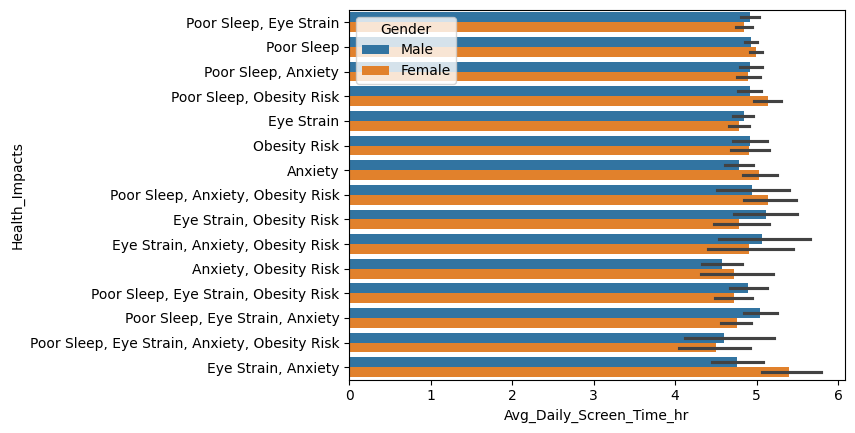

In [28]:
# So here i can conclude that the higher screen time is causing more problem which is generally true in day to day life and my hypothesis that i thought is correct 
# Second conclusion that i can draw from here that mostly the females are suffering from eye-strain and aniety together are due to the useage above 5 hours 

sns.barplot(data=df,x=df['Avg_Daily_Screen_Time_hr'],y=df['Health_Impacts'],hue=df['Gender'])

<Axes: xlabel='Primary_Device', ylabel='Avg_Daily_Screen_Time_hr'>

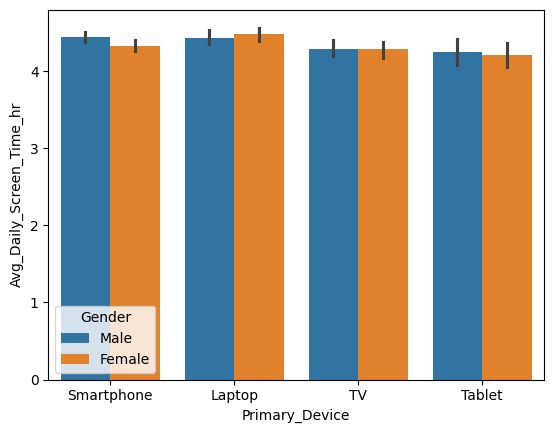

In [29]:
# I use this plot to check the ditribution of devices which is bieng use by people based upon there gender and here i can get that mostly femlaes perfer to use the laptop so while training it might be the chances even the slight more chances that if predicting that if it is female it might be bit biased towards the Laptop 
# And for the male we get to the insight that most of males prefer to use the Smartphone and we can assume that they prefer for its easier to compitablity and portability 

sns.barplot(data=df,x=df['Primary_Device'],y=df['Avg_Daily_Screen_Time_hr'],hue=df['Gender'])

<Axes: >

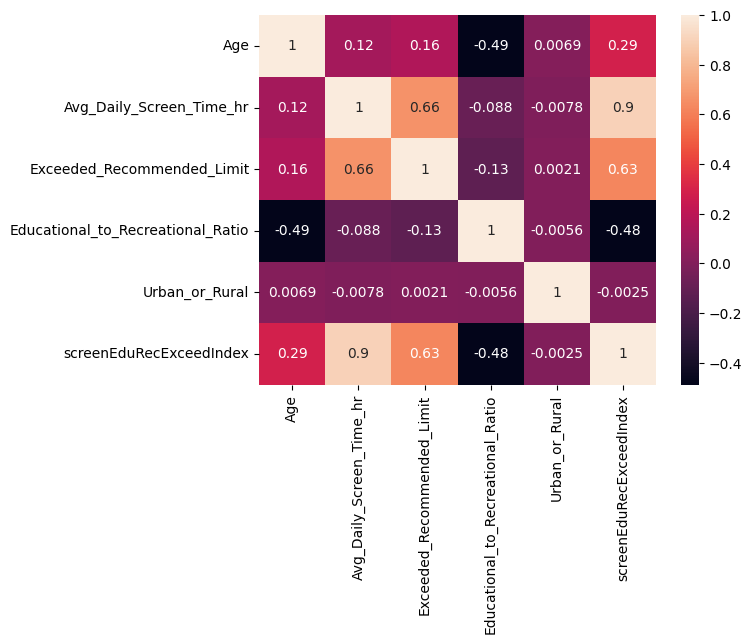

In [30]:
# Now i want to check the coorelation of every other columns with each other to check which is going to impact the model most during training and get the basic idea that it might not get bit biased towards that model 
# Here i made a mistake that i didnt convert the exceed recommend limit cause it will be in 0 or 1 only
correlation=df.corr(numeric_only=True)
sns.heatmap(data=correlation,annot=True)

In [31]:
df['Exceeded_Recommended_Limit']=pd.get_dummies(df['Exceeded_Recommended_Limit'],drop_first=True,dtype=int)

In [32]:
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,screenEduRecExceedIndex
0,14,Male,3.99,Smartphone,1,0.42,"Poor Sleep, Eye Strain",1,9.500000
1,11,Female,4.61,Laptop,1,0.30,Poor Sleep,1,15.366667
2,18,Female,3.73,TV,1,0.32,Poor Sleep,1,11.656250
3,15,Female,1.21,Laptop,0,0.39,NaN,1,3.102564
4,12,Female,5.89,Smartphone,1,0.49,"Poor Sleep, Anxiety",1,12.020408
...,...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,1,0.44,Poor Sleep,1,7.409091
9708,17,Female,4.43,Smartphone,1,0.40,Poor Sleep,0,11.075000
9709,16,Male,5.62,Smartphone,1,0.39,"Poor Sleep, Eye Strain, Anxiety",0,14.410256
9710,17,Male,5.60,TV,1,0.43,Poor Sleep,1,13.023256


<Axes: >

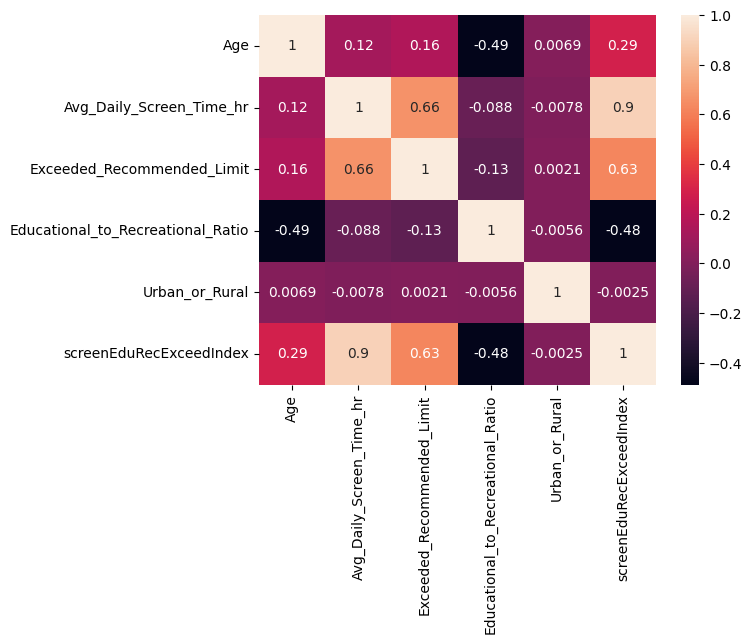

In [33]:
# so here we can see that exceed scren limit is mostly getting impacted by avg daily screen time which is true for hypothesis that more you on the electronic gadgtes the more exceed you will be doing 
correlation=df.corr(numeric_only=True)
sns.heatmap(data=correlation,annot=True)

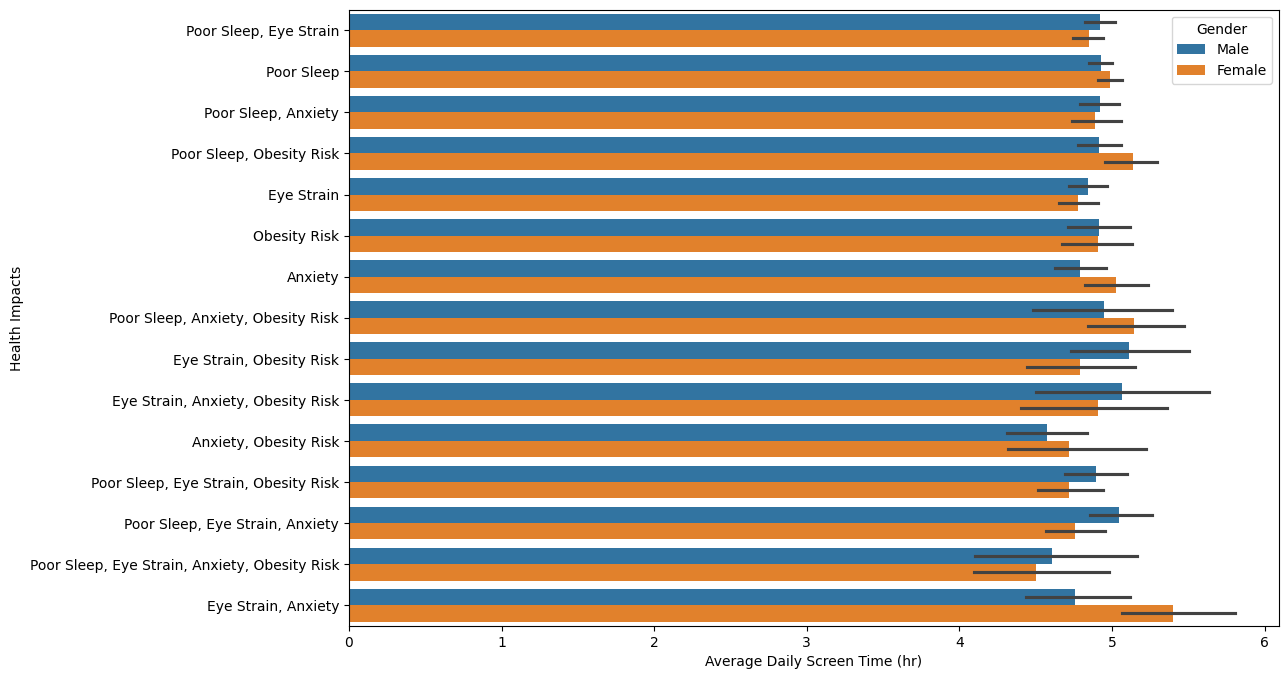

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='Avg_Daily_Screen_Time_hr', y='Health_Impacts',hue=df['Gender'])
plt.xlabel("Average Daily Screen Time (hr)")
plt.ylabel("Health Impacts")
plt.show()

# The analysis shows that individuals with multiple health impacts, especially those involving anxiety, report the highest average daily screen time (~5+ hrs)
# The average daily screen time is consistently around 4.5–5 hours
#This suggests that high screen exposure is a common denominator across different health risks.
# One more insight that we can gain here is that most likely the females are the one to get the eye strain and anxiety and this can be a hypothesis that female tends to use more phone than man

In [35]:
import pandas as pd


summary = df.groupby("Health_Impacts")["Avg_Daily_Screen_Time_hr"].mean().sort_values()


insights = []
avg_time = df["Avg_Daily_Screen_Time_hr"].mean()

insights.append(f"Overall average daily screen time: {avg_time:.2f} hrs.")

highest = summary.idxmax()
insights.append(f"Category with highest screen time: {highest} ({summary.max():.2f} hrs).")

lowest = summary.idxmin()
insights.append(f"Category with lowest screen time: {lowest} ({summary.min():.2f} hrs).")

if summary.max() - summary.min() < 1:
    insights.append("Screen time is fairly consistent across categories (~±0.5 hrs).")
else:
    insights.append("There is significant variation across categories.")

print("\n".join(insights))
# so from this we can check the major problem her eis the eye strain and anxiety a

Overall average daily screen time: 4.35 hrs.
Category with highest screen time: Eye Strain, Anxiety (5.08 hrs).
Category with lowest screen time: Poor Sleep, Eye Strain, Anxiety, Obesity Risk (4.55 hrs).
Screen time is fairly consistent across categories (~±0.5 hrs).


<Axes: xlabel='Gender', ylabel='Exceeded_Recommended_Limit'>

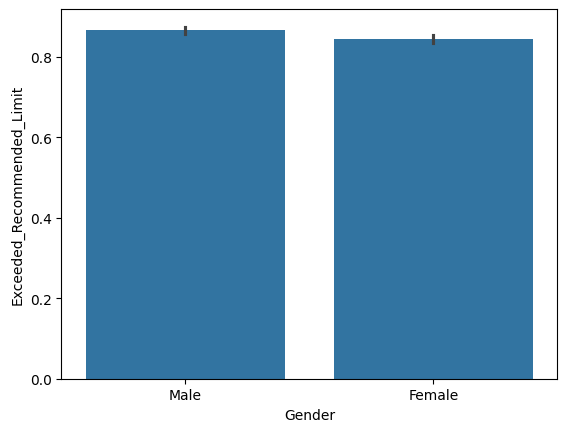

In [36]:
sns.barplot(data=df,x=df['Gender'],y=df['Exceeded_Recommended_Limit'])

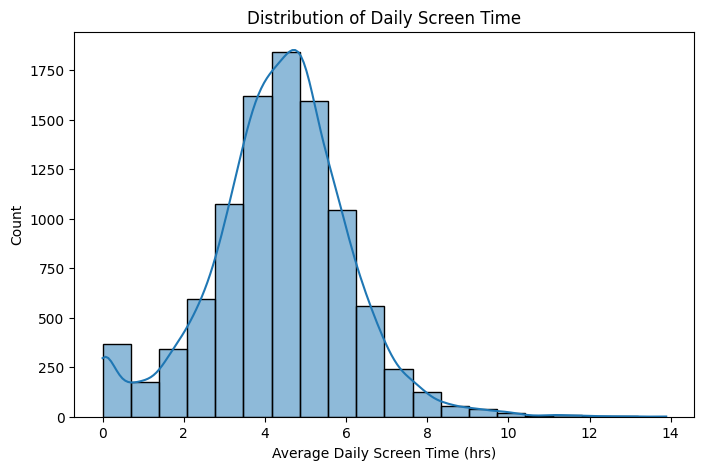

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(df['Avg_Daily_Screen_Time_hr'], bins=20, kde=True)
plt.xlabel("Average Daily Screen Time (hrs)")
plt.title("Distribution of Daily Screen Time")
plt.show()
# so this is the plot that we can get here is that mostly poeple on avg use the5 hours to 5.5 rs 

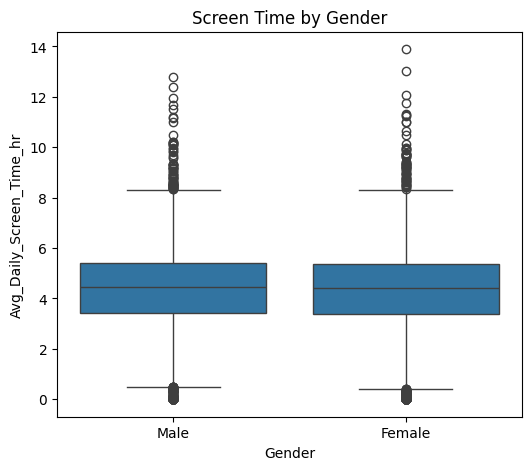

In [38]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr')
plt.title("Screen Time by Gender")
plt.show()
#  so here we can see that thegenearally females tends to overuse 

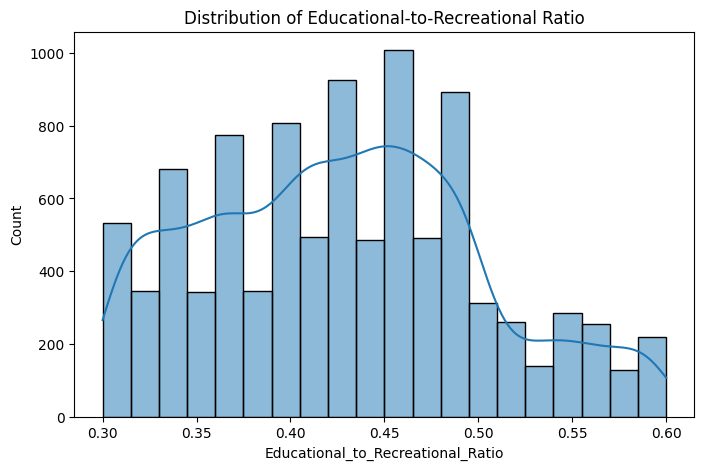

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df['Educational_to_Recreational_Ratio'], bins=20, kde=True)
plt.title("Distribution of Educational-to-Recreational Ratio")
plt.show()


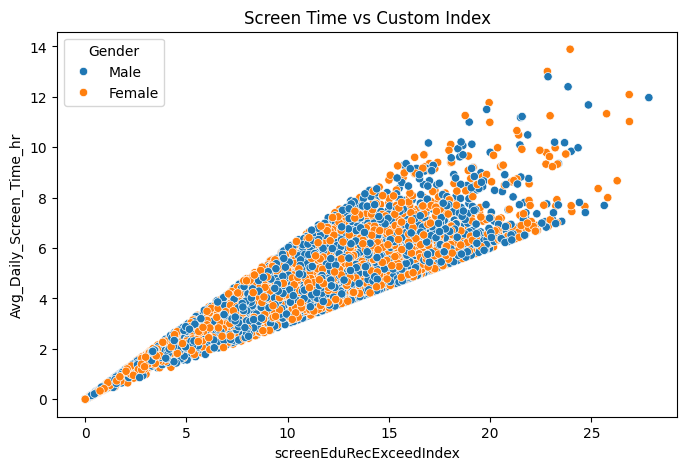

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='screenEduRecExceedIndex', y='Avg_Daily_Screen_Time_hr', hue='Gender')
plt.title("Screen Time vs Custom Index")
plt.show()


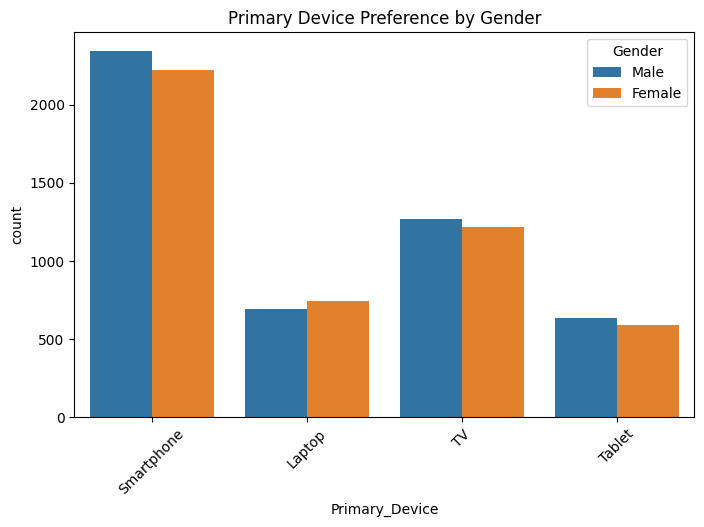

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Primary_Device', hue='Gender')
plt.title("Primary Device Preference by Gender")
plt.xticks(rotation=45)
plt.show()


# So from this we can get the insight that there in this model we can get the basic idea that smarpthphone is use by both categories most and males use it %more

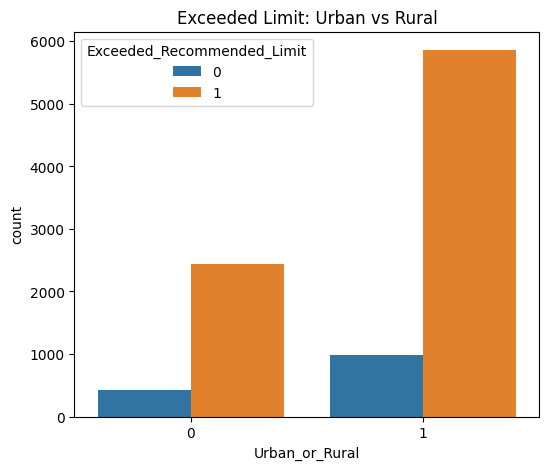

In [42]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Urban_or_Rural', hue='Exceeded_Recommended_Limit')
plt.title("Exceeded Limit: Urban vs Rural")
plt.show()

# so here we can see that in this urban zone we can see that mostly in urban areas people are extremely using the phones and crsoooing the time and that too in females


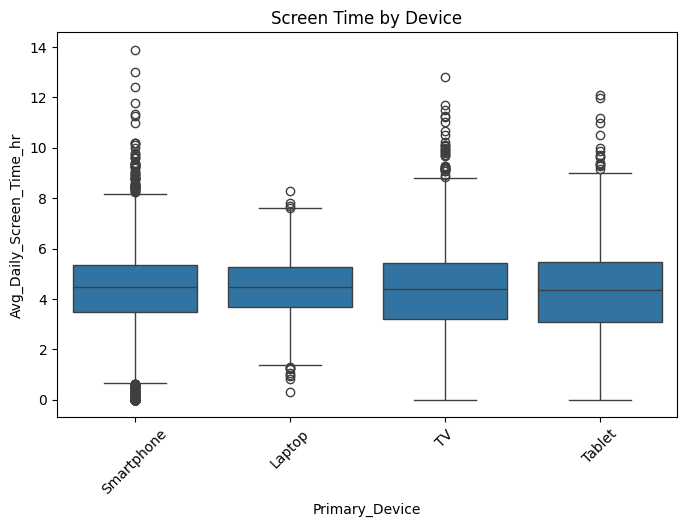

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr')
plt.xticks(rotation=45)
plt.title("Screen Time by Device")
plt.show()


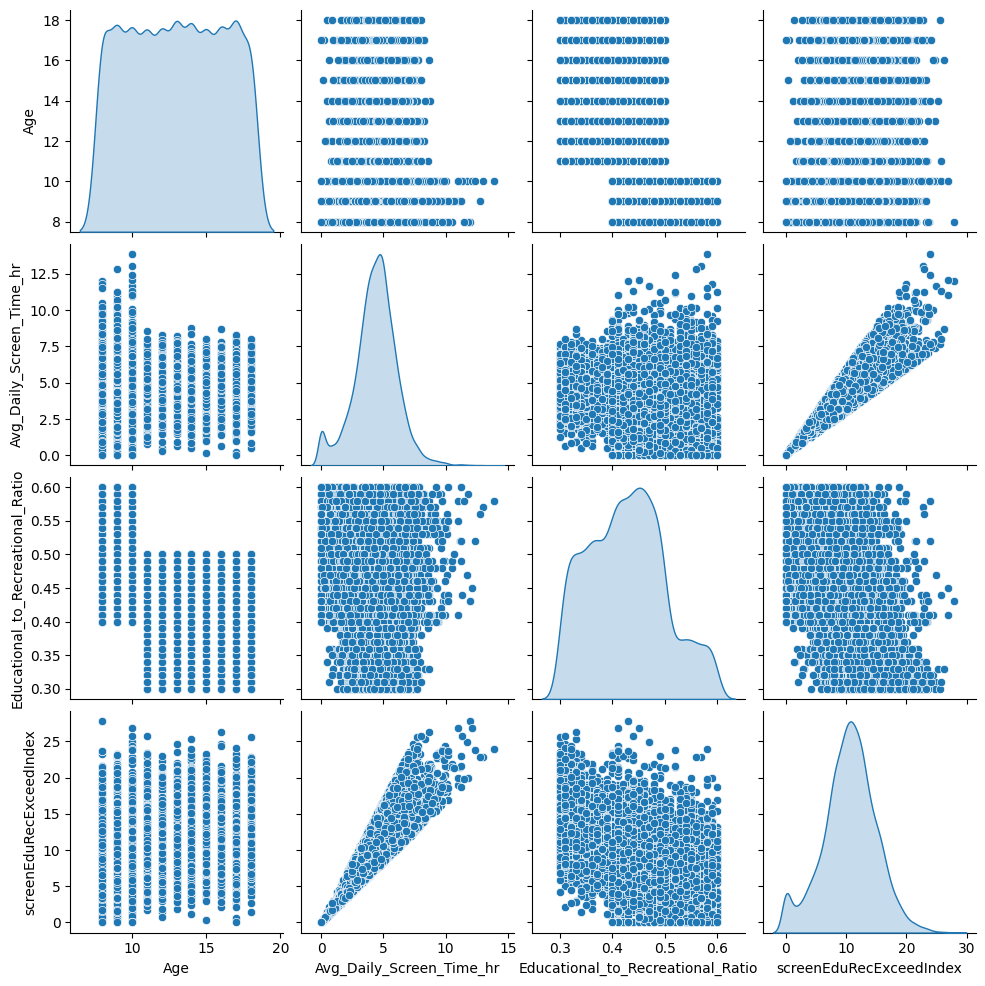

In [44]:
sns.pairplot(df[['Age','Avg_Daily_Screen_Time_hr','Educational_to_Recreational_Ratio','screenEduRecExceedIndex']], diag_kind="kde")
plt.show()


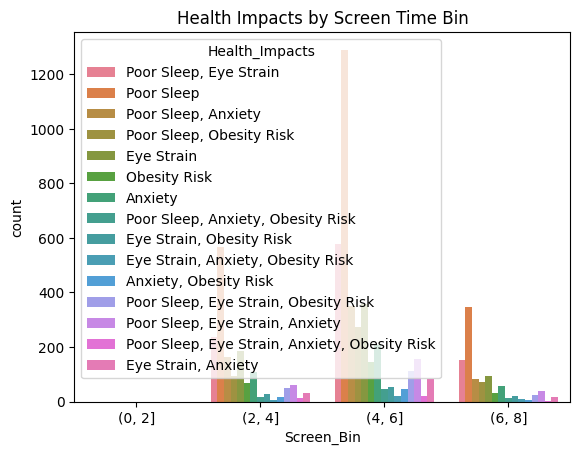

In [45]:
df['Screen_Bin'] = pd.cut(df['Avg_Daily_Screen_Time_hr'], bins=[0,2,4,6,8])

sns.countplot(data=df, x='Screen_Bin', hue='Health_Impacts')

plt.title("Health Impacts by Screen Time Bin")
plt.show()


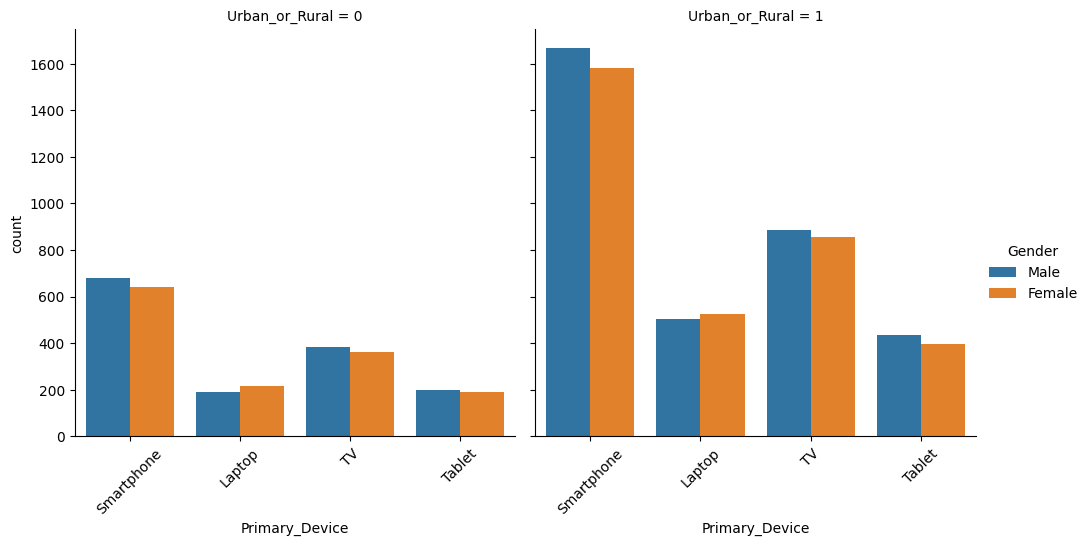

In [46]:
g = sns.catplot(data=df, x='Primary_Device', hue='Gender', col='Urban_or_Rural', kind='count')
g.set_xticklabels(rotation=45)


<Axes: xlabel='Gender', ylabel='Avg_Daily_Screen_Time_hr'>

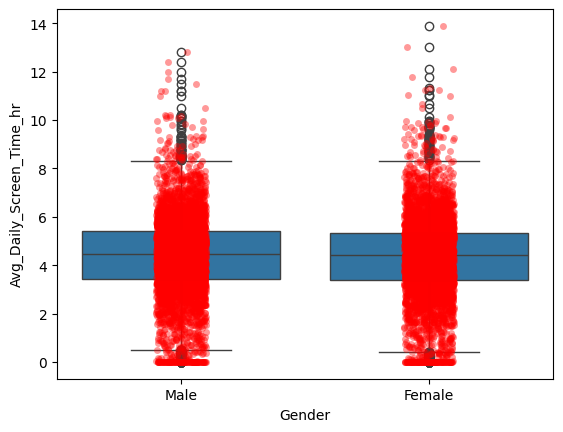

In [47]:
sns.boxplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr')
sns.stripplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', color="red", alpha=0.4)


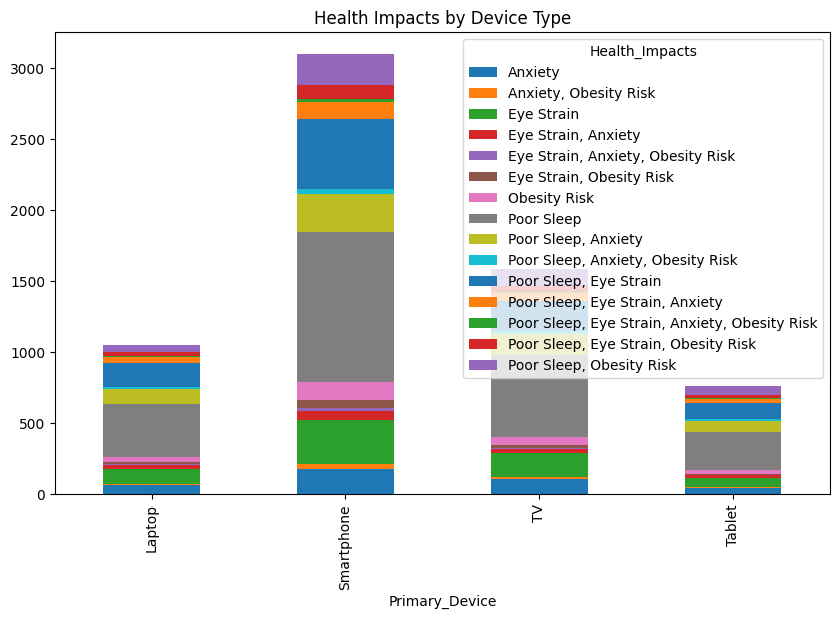

In [48]:
pd.crosstab(df['Primary_Device'], df['Health_Impacts']).plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Health Impacts by Device Type")
plt.show()


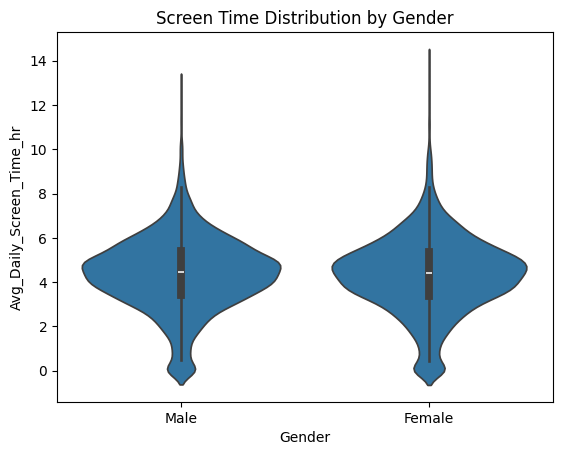

In [49]:
sns.violinplot(x="Gender", y="Avg_Daily_Screen_Time_hr", data=df)
plt.title("Screen Time Distribution by Gender")
plt.show()


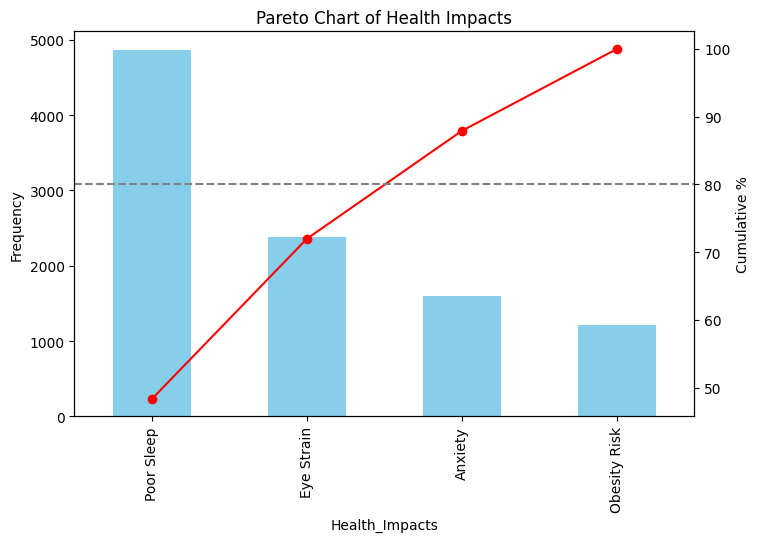

In [50]:
import pandas as pd
import matplotlib.pyplot as plt


df_exploded = df.assign(Health_Impacts=df['Health_Impacts'].str.split(', ')).explode('Health_Impacts')

impact_counts = df_exploded['Health_Impacts'].value_counts()

# Pareto data
cum_percent = impact_counts.cumsum() / impact_counts.sum() * 100

fig, ax1 = plt.subplots(figsize=(8,5))

# Bar chart
impact_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_ylabel("Frequency")
ax1.set_title("Pareto Chart of Health Impacts")

# Cumulative percentage line
ax2 = ax1.twinx()
cum_percent.plot(marker='o', color='red', ax=ax2)
ax2.set_ylabel("Cumulative %")
ax2.axhline(80, color='gray', linestyle='--')  # 80% threshold

plt.show()


<Figure size 700x500 with 0 Axes>

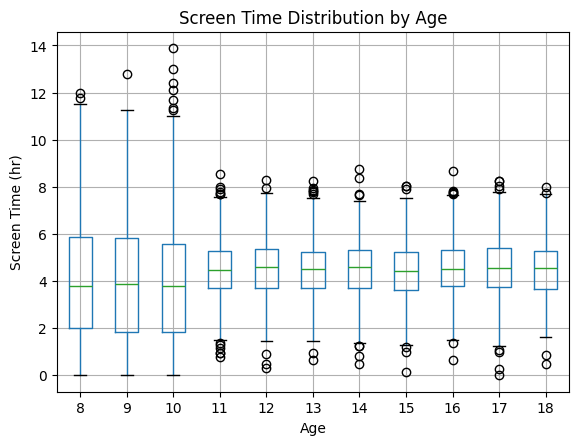

In [51]:
plt.figure(figsize=(7,5))
df.boxplot(column='Avg_Daily_Screen_Time_hr', by='Age')
plt.title("Screen Time Distribution by Age")
plt.suptitle("")
plt.xlabel("Age")
plt.ylabel("Screen Time (hr)")
plt.show()



In [52]:
# now we are going to fill out the missing values from the data
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
screenEduRecExceedIndex                 0
Screen_Bin                            399
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Poor Sleep, Eye Strain'),
  Text(1, 0, 'Poor Sleep'),
  Text(2, 0, 'Poor Sleep, Anxiety'),
  Text(3, 0, 'Poor Sleep, Obesity Risk'),
  Text(4, 0, 'Eye Strain'),
  Text(5, 0, 'Obesity Risk'),
  Text(6, 0, 'Anxiety'),
  Text(7, 0, 'Poor Sleep, Anxiety, Obesity Risk'),
  Text(8, 0, 'Eye Strain, Obesity Risk'),
  Text(9, 0, 'Eye Strain, Anxiety, Obesity Risk'),
  Text(10, 0, 'Anxiety, Obesity Risk'),
  Text(11, 0, 'Poor Sleep, Eye Strain, Obesity Risk'),
  Text(12, 0, 'Poor Sleep, Eye Strain, Anxiety'),
  Text(13, 0, 'Poor Sleep, Eye Strain, Anxiety, Obesity Risk'),
  Text(14, 0, 'Eye Strain, Anxiety')])

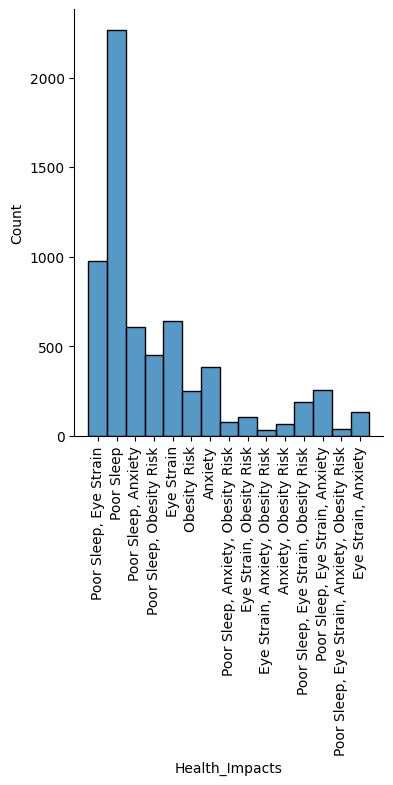

In [53]:
sns.displot(df['Health_Impacts'])
plt.xticks(rotation=90)
# before cleaning the missing values 

C:\Users\91800\AppData\Local\Temp\ipykernel_13132\3511183802.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['screenEduRecExceedIndex'])


<Axes: xlabel='screenEduRecExceedIndex', ylabel='Density'>

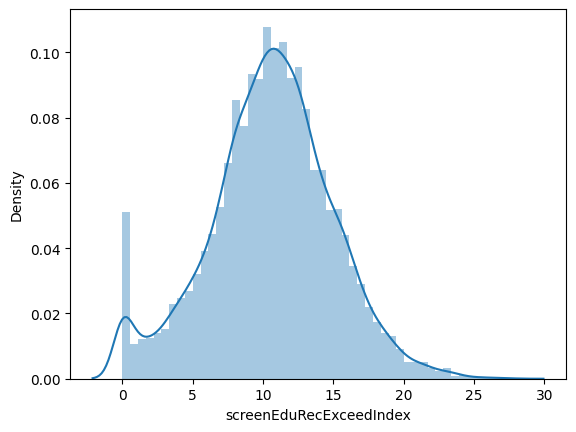

In [54]:
sns.distplot(df['screenEduRecExceedIndex'])

In [55]:
df['Health_Impacts'] = df['Health_Impacts'].fillna(df['Health_Impacts'].mode()[0])


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Poor Sleep, Eye Strain'),
  Text(1, 0, 'Poor Sleep'),
  Text(2, 0, 'Poor Sleep, Anxiety'),
  Text(3, 0, 'Poor Sleep, Obesity Risk'),
  Text(4, 0, 'Eye Strain'),
  Text(5, 0, 'Obesity Risk'),
  Text(6, 0, 'Anxiety'),
  Text(7, 0, 'Poor Sleep, Anxiety, Obesity Risk'),
  Text(8, 0, 'Eye Strain, Obesity Risk'),
  Text(9, 0, 'Eye Strain, Anxiety, Obesity Risk'),
  Text(10, 0, 'Anxiety, Obesity Risk'),
  Text(11, 0, 'Poor Sleep, Eye Strain, Obesity Risk'),
  Text(12, 0, 'Poor Sleep, Eye Strain, Anxiety'),
  Text(13, 0, 'Poor Sleep, Eye Strain, Anxiety, Obesity Risk'),
  Text(14, 0, 'Eye Strain, Anxiety')])

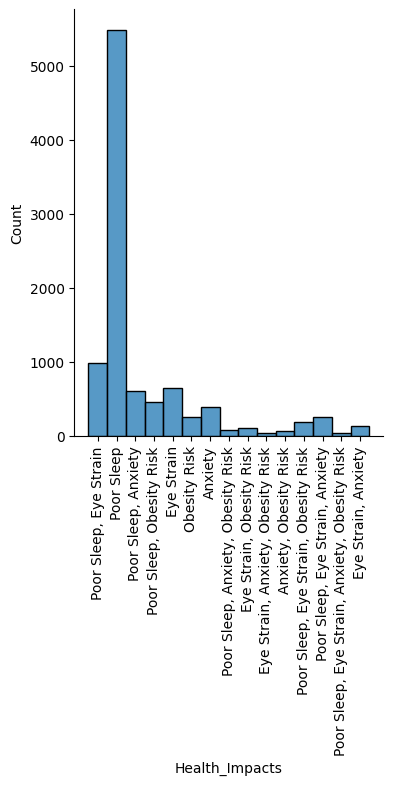

In [56]:
sns.displot(df['Health_Impacts'])
plt.xticks(rotation=90)

# After cleaning the missing values the distirbtuon got cooked

In [57]:
import pandas as pd
import numpy as np

# numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns

# check skewness
df[num_cols].skew()


Age                                 -0.002533
Avg_Daily_Screen_Time_hr            -0.068933
Exceeded_Recommended_Limit          -2.013528
Educational_to_Recreational_Ratio    0.252592
Urban_or_Rural                      -0.901372
screenEduRecExceedIndex             -0.115947
dtype: float64

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64','float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ]
)


In [59]:
# Fit and transform
transformed = preprocessor.fit_transform(df)

# Convert back to dataframe for readability
import numpy as np

feature_names = (
    preprocessor.named_transformers_["num"].get_feature_names_out(num_cols).tolist() +
    preprocessor.named_transformers_["cat"].get_feature_names_out(cat_cols).tolist()
)

df_transformed = pd.DataFrame(transformed.toarray() if hasattr(transformed, "toarray") else transformed,
                              columns=feature_names)


In [60]:
df_transformed

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio,screenEduRecExceedIndex,Gender_Male,Primary_Device_Smartphone,Primary_Device_TV,Primary_Device_Tablet,"Health_Impacts_Anxiety, Obesity Risk",Health_Impacts_Eye Strain,...,"Health_Impacts_Eye Strain, Obesity Risk",Health_Impacts_Obesity Risk,Health_Impacts_Poor Sleep,"Health_Impacts_Poor Sleep, Anxiety","Health_Impacts_Poor Sleep, Anxiety, Obesity Risk","Health_Impacts_Poor Sleep, Eye Strain","Health_Impacts_Poor Sleep, Eye Strain, Anxiety","Health_Impacts_Poor Sleep, Eye Strain, Anxiety, Obesity Risk","Health_Impacts_Poor Sleep, Eye Strain, Obesity Risk","Health_Impacts_Poor Sleep, Obesity Risk"
0,0.322805,-0.211179,-0.098694,-0.238932,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.625879,0.149675,-1.737647,1.091344,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.587718,-0.362506,-1.464488,0.250001,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.639033,-1.829204,-0.508432,-1.689561,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.309651,0.894665,0.857362,0.332574,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,1.271490,-0.636057,0.174465,-0.713049,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9708,1.271490,0.044911,-0.371853,0.118202,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9709,0.955262,0.737519,-0.508432,0.874476,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9710,1.271490,0.725878,0.037886,0.559972,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df_transformed['Educational_to_Recreational_Ratio']

0      -0.098694
1      -1.737647
2      -1.464488
3      -0.508432
4       0.857362
          ...   
9707    0.174465
9708   -0.371853
9709   -0.508432
9710    0.037886
9711   -1.327909
Name: Educational_to_Recreational_Ratio, Length: 9712, dtype: float64

In [62]:
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,screenEduRecExceedIndex,Screen_Bin
0,14,Male,3.99,Smartphone,1,0.42,"Poor Sleep, Eye Strain",1,9.500000,"(2, 4]"
1,11,Female,4.61,Laptop,1,0.30,Poor Sleep,1,15.366667,"(4, 6]"
2,18,Female,3.73,TV,1,0.32,Poor Sleep,1,11.656250,"(2, 4]"
3,15,Female,1.21,Laptop,0,0.39,Poor Sleep,1,3.102564,"(0, 2]"
4,12,Female,5.89,Smartphone,1,0.49,"Poor Sleep, Anxiety",1,12.020408,"(4, 6]"
...,...,...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,1,0.44,Poor Sleep,1,7.409091,"(2, 4]"
9708,17,Female,4.43,Smartphone,1,0.40,Poor Sleep,0,11.075000,"(4, 6]"
9709,16,Male,5.62,Smartphone,1,0.39,"Poor Sleep, Eye Strain, Anxiety",0,14.410256,"(4, 6]"
9710,17,Male,5.60,TV,1,0.43,Poor Sleep,1,13.023256,"(4, 6]"


# Now we are going to first go for the classifcation and here since it is the classification model 

In [63]:
df_transformed['Exceed_Recomendedlimit']=df['Exceeded_Recommended_Limit']

In [64]:
X_class=df_transformed.drop(['Exceed_Recomendedlimit'],axis=1)
X_class

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio,screenEduRecExceedIndex,Gender_Male,Primary_Device_Smartphone,Primary_Device_TV,Primary_Device_Tablet,"Health_Impacts_Anxiety, Obesity Risk",Health_Impacts_Eye Strain,...,"Health_Impacts_Eye Strain, Obesity Risk",Health_Impacts_Obesity Risk,Health_Impacts_Poor Sleep,"Health_Impacts_Poor Sleep, Anxiety","Health_Impacts_Poor Sleep, Anxiety, Obesity Risk","Health_Impacts_Poor Sleep, Eye Strain","Health_Impacts_Poor Sleep, Eye Strain, Anxiety","Health_Impacts_Poor Sleep, Eye Strain, Anxiety, Obesity Risk","Health_Impacts_Poor Sleep, Eye Strain, Obesity Risk","Health_Impacts_Poor Sleep, Obesity Risk"
0,0.322805,-0.211179,-0.098694,-0.238932,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.625879,0.149675,-1.737647,1.091344,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.587718,-0.362506,-1.464488,0.250001,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.639033,-1.829204,-0.508432,-1.689561,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.309651,0.894665,0.857362,0.332574,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,1.271490,-0.636057,0.174465,-0.713049,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9708,1.271490,0.044911,-0.371853,0.118202,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9709,0.955262,0.737519,-0.508432,0.874476,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9710,1.271490,0.725878,0.037886,0.559972,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
Y_class=df_transformed['Exceed_Recomendedlimit']

In [108]:
Y_class

0       1
1       1
2       1
3       0
4       1
       ..
9707    1
9708    1
9709    1
9710    1
9711    1
Name: Exceed_Recomendedlimit, Length: 9712, dtype: int32

In [66]:
X_train_class,X_test_class,Y_train_class,Y_test_class=train_test_split(X_class,Y_class,random_state=42,test_size=0.2)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

def get_best_params(model_name, model, X_train, y_train, param_grids, cv=3):
    """Runs GridSearchCV for a given model."""
    print(f"\n🔍 Running GridSearch for {model_name}...")
    grid = GridSearchCV(model, param_grids[model_name], cv=cv, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"✅ Best {model_name} Params: {grid.best_params_}")
    return grid.best_estimator_, grid.best_params_

def train_all_models(X_train, X_test, y_train, y_test, param_grids=None):
    # Base models
    base_models = {
        "LogisticRegression": LogisticRegression(max_iter=200, C=0.8, solver='liblinear'),
        "DecisionTree": DecisionTreeClassifier(max_depth=6, min_samples_split=5, criterion='entropy'),
        "RandomForest": RandomForestClassifier(n_estimators=120, max_depth=8, min_samples_split=4, random_state=42),
        "GradientBoosting": GradientBoostingClassifier(n_estimators=150, learning_rate=0.07, max_depth=3, random_state=42),
        "AdaBoost": AdaBoostClassifier(n_estimators=120, learning_rate=0.9, random_state=42),
        "Bagging": BaggingClassifier(n_estimators=60, random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance'),
        "XGBoost": XGBClassifier(n_estimators=180, learning_rate=0.08, max_depth=4, 
                                 use_label_encoder=False, eval_metric='logloss', random_state=42)
    }

    # Voting ensemble
    voting = VotingClassifier(
        estimators=[
            ('lr', base_models["LogisticRegression"]),
            ('dt', base_models["DecisionTree"]),
            ('rf', base_models["RandomForest"]),
            ('knn', base_models["KNN"])
        ],
        voting='soft'
    )

    # Stacking ensemble
    stacking = StackingClassifier(
        estimators=[
            ('rf', base_models["RandomForest"]),
            ('gb', base_models["GradientBoosting"]),
            ('knn', base_models["KNN"])
        ],
        final_estimator=LogisticRegression(max_iter=200, solver='liblinear'),
        passthrough=True
    )

    # Add ensembles
    models = base_models.copy()
    models["Voting"] = voting
    models["Stacking"] = stacking

    results = []
    best_models = {}

    # 🔹 Train & evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # ROC AUC
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_proba)
        else:
            auc = roc_auc_score(y_test, y_pred)

        results.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, zero_division=0),
            "Recall": recall_score(y_test, y_pred, zero_division=0),
            "F1 Score": f1_score(y_test, y_pred, zero_division=0),
            "ROC AUC": auc
        })

    # 🔹 Run GridSearch only if param_grids is provided
    if param_grids:
        for name, model in base_models.items():  # skip Voting/Stacking
            if name in param_grids:
                best_model, best_params = get_best_params(name, model, X_train, y_train, param_grids)
                best_models[name] = best_model

    # Results DataFrame
    results_df = pd.DataFrame(results).sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)

    return results_df, best_models


In [74]:

param_grids = {
    "LogisticRegression": {
        "C": [0.1, 0.5, 0.8, 1],
        "solver": ["liblinear"]
    },
    "DecisionTree": {
        "max_depth": [4, 6, 8],
        "min_samples_split": [2, 5, 10],
        "criterion": ["gini", "entropy"]
    },
    "RandomForest": {
        "n_estimators": [100, 120, 150],
        "max_depth": [6, 8, 10],
        "min_samples_split": [2, 4, 5]
    },
    "GradientBoosting": {
        "n_estimators": [100, 150, 200],
        "learning_rate": [0.05, 0.07, 0.1],
        "max_depth": [3, 4, 5]
    },
    "KNN": {
        "n_neighbors": [5, 7, 9],
        "weights": ["uniform", "distance"]
    },
    "XGBoost": {
        "n_estimators": [150, 180, 200],
        "learning_rate": [0.05, 0.08, 0.1],
        "max_depth": [3, 4, 5]
    }
}



results_df, tuned_models = train_all_models(X_train_class, X_test_class, Y_train_class, Y_test_class, param_grids)
print(results_df)


C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



🔍 Running GridSearch for LogisticRegression...
✅ Best LogisticRegression Params: {'C': 0.5, 'solver': 'liblinear'}

🔍 Running GridSearch for DecisionTree...
✅ Best DecisionTree Params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

🔍 Running GridSearch for RandomForest...
✅ Best RandomForest Params: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 100}

🔍 Running GridSearch for GradientBoosting...
✅ Best GradientBoosting Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

🔍 Running GridSearch for KNN...
✅ Best KNN Params: {'n_neighbors': 9, 'weights': 'distance'}

🔍 Running GridSearch for XGBoost...


C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


✅ Best XGBoost Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
                Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0        DecisionTree  1.000000   1.000000  1.000000  1.000000  1.000000
1        RandomForest  1.000000   1.000000  1.000000  1.000000  1.000000
2    GradientBoosting  1.000000   1.000000  1.000000  1.000000  1.000000
3            AdaBoost  1.000000   1.000000  1.000000  1.000000  1.000000
4             Bagging  1.000000   1.000000  1.000000  1.000000  1.000000
5             XGBoost  1.000000   1.000000  1.000000  1.000000  1.000000
6              Voting  1.000000   1.000000  1.000000  1.000000  1.000000
7            Stacking  1.000000   1.000000  1.000000  1.000000  1.000000
8                 KNN  0.985075   0.989189  0.993366  0.991273  0.996961
9  LogisticRegression  0.975811   0.986119  0.985525  0.985822  0.996620


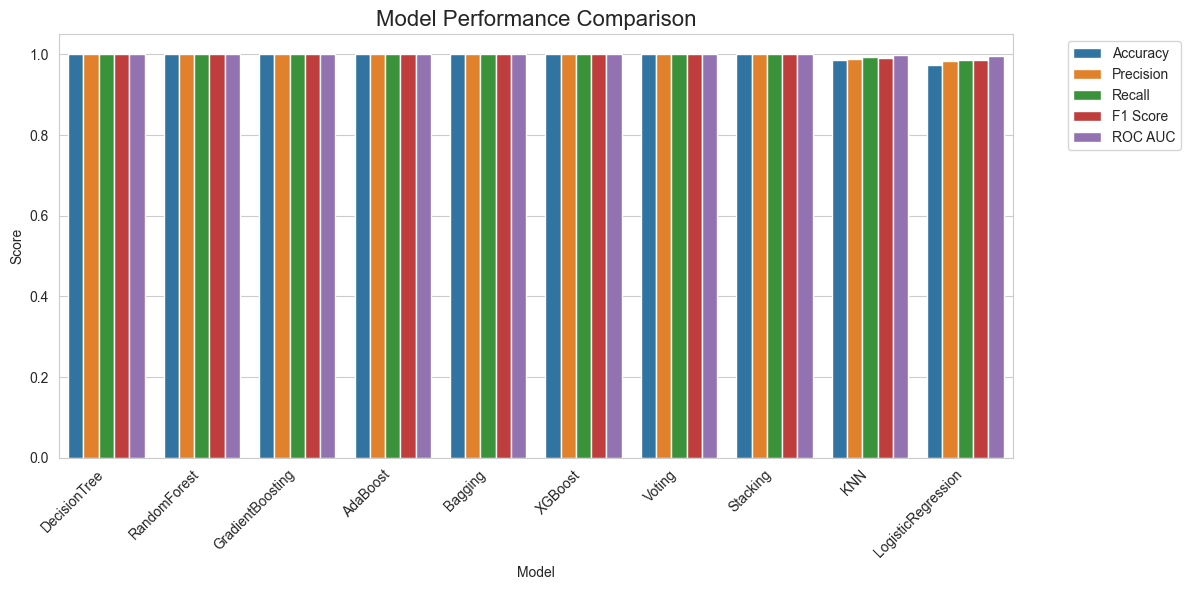

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

results_long = results_df.melt(
    id_vars='Model', 
    value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    var_name='Metric', 
    value_name='Score'
)

sns.barplot(x='Model', y='Score', hue='Metric', data=results_long)
plt.title('Model Performance Comparison', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

def get_best_params(model_name, model, X_train, y_train, param_grids, cv=3):
    """Runs GridSearchCV for a given model and returns best estimator and params."""
    print(f"\n🔍 Running GridSearch for {model_name}...")
    grid = GridSearchCV(model, param_grids[model_name], cv=cv, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"✅ Best {model_name} Params: {grid.best_params_}")
    return grid.best_estimator_, grid.best_params_

def train_all_models(X_train, X_test, y_train, y_test, param_grids=None, cv=3):
    """Trains base models, builds ensembles, evaluates all models, and returns results."""
    
    # -------------------- Base Models --------------------
    base_models = {
        "LogisticRegression": LogisticRegression(max_iter=200, solver='liblinear'),
        "DecisionTree": DecisionTreeClassifier(),
        "RandomForest": RandomForestClassifier(random_state=42),
        "GradientBoosting": GradientBoostingClassifier(random_state=42),
        "AdaBoost": AdaBoostClassifier(random_state=42),
        "Bagging": BaggingClassifier(random_state=42),
        "KNN": KNeighborsClassifier(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    }
    
    # -------------------- Tune Base Models --------------------
    tuned_models = {}
    for name, model in base_models.items():
        if param_grids and name in param_grids:
            best_model, _ = get_best_params(name, model, X_train, y_train, param_grids, cv=cv)
            tuned_models[name] = best_model
        else:
            model.fit(X_train, y_train)
            tuned_models[name] = model
    
    # -------------------- Build Ensembles --------------------
    voting = VotingClassifier(
        estimators=[
            ('lr', tuned_models["LogisticRegression"]),
            ('dt', tuned_models["DecisionTree"]),
            ('rf', tuned_models["RandomForest"]),
            ('knn', tuned_models["KNN"])
        ],
        voting='soft'
    )
    
    stacking = StackingClassifier(
        estimators=[
            ('rf', tuned_models["RandomForest"]),
            ('gb', tuned_models["GradientBoosting"]),
            ('knn', tuned_models["KNN"])
        ],
        final_estimator=LogisticRegression(max_iter=200, solver='liblinear'),
        passthrough=True
    )
    
    # -------------------- Combine All Models --------------------
    all_models = tuned_models.copy()
    all_models["Voting"] = voting
    all_models["Stacking"] = stacking
    
    # -------------------- Evaluate Models --------------------
    results = []
    for name, model in all_models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # ROC AUC
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_proba)
        else:
            auc = roc_auc_score(y_test, y_pred)
        
        results.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, zero_division=0),
            "Recall": recall_score(y_test, y_pred, zero_division=0),
            "F1 Score": f1_score(y_test, y_pred, zero_division=0),
            "ROC AUC": auc
        })
    
    results_df = pd.DataFrame(results).sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)
    
    return results_df, tuned_models


In [89]:
param_grids = {
    "LogisticRegression": {"C": [0.1, 0.5, 0.8, 1], "solver": ["liblinear"]},
    "DecisionTree": {"max_depth": [4,6,8], "min_samples_split": [2,5,10], "criterion": ["gini","entropy"]},
    "RandomForest": {"n_estimators": [100,120,150], "max_depth": [6,8,10], "min_samples_split": [2,4,5]},
    "GradientBoosting": {"n_estimators": [100,150,200], "learning_rate": [0.05,0.07,0.1], "max_depth": [3,4,5]},
    "KNN": {"n_neighbors": [5,7,9], "weights": ["uniform","distance"]},
    "XGBoost": {"n_estimators": [150,180,200], "learning_rate": [0.05,0.08,0.1], "max_depth": [3,4,5]}
}

results_df, tuned_models = train_all_models(X_train_class, X_test_class, Y_train_class, Y_test_class, param_grids)
print(results_df)
# SO even after trying to chang and fit the code and all my models were kept bieng overfit and all so i have to change the fixing

C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



🔍 Running GridSearch for LogisticRegression...
✅ Best LogisticRegression Params: {'C': 0.5, 'solver': 'liblinear'}

🔍 Running GridSearch for DecisionTree...
✅ Best DecisionTree Params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

🔍 Running GridSearch for RandomForest...
✅ Best RandomForest Params: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 100}

🔍 Running GridSearch for GradientBoosting...
✅ Best GradientBoosting Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

🔍 Running GridSearch for KNN...
✅ Best KNN Params: {'n_neighbors': 9, 'weights': 'distance'}

🔍 Running GridSearch for XGBoost...


C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


✅ Best XGBoost Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
                Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0        DecisionTree  1.000000   1.000000  1.000000  1.000000  1.000000
1        RandomForest  1.000000   1.000000  1.000000  1.000000  1.000000
2    GradientBoosting  1.000000   1.000000  1.000000  1.000000  1.000000
3            AdaBoost  1.000000   1.000000  1.000000  1.000000  1.000000
4             Bagging  1.000000   1.000000  1.000000  1.000000  1.000000
5             XGBoost  1.000000   1.000000  1.000000  1.000000  1.000000
6              Voting  1.000000   1.000000  1.000000  1.000000  1.000000
7            Stacking  1.000000   1.000000  1.000000  1.000000  1.000000
8                 KNN  0.985589   0.989784  0.993366  0.991571  0.998764
9  LogisticRegression  0.974781   0.984347  0.986128  0.985237  0.996574


In [87]:
import joblib 

In [91]:

for model_name, model in tuned_models.items():
    filename = f"{model_name}_model.pkl"
    joblib.dump(model, filename)
    print(f"✅ Saved {model_name} as {filename}")


✅ Saved LogisticRegression as LogisticRegression_model.pkl
✅ Saved DecisionTree as DecisionTree_model.pkl
✅ Saved RandomForest as RandomForest_model.pkl
✅ Saved GradientBoosting as GradientBoosting_model.pkl
✅ Saved AdaBoost as AdaBoost_model.pkl
✅ Saved Bagging as Bagging_model.pkl
✅ Saved KNN as KNN_model.pkl
✅ Saved XGBoost as XGBoost_model.pkl


In [107]:
X_train_class.columns

Index(['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio',
       'screenEduRecExceedIndex', 'Gender_Male', 'Primary_Device_Smartphone',
       'Primary_Device_TV', 'Primary_Device_Tablet',
       'Health_Impacts_Anxiety, Obesity Risk', 'Health_Impacts_Eye Strain',
       'Health_Impacts_Eye Strain, Anxiety',
       'Health_Impacts_Eye Strain, Anxiety, Obesity Risk',
       'Health_Impacts_Eye Strain, Obesity Risk',
       'Health_Impacts_Obesity Risk', 'Health_Impacts_Poor Sleep',
       'Health_Impacts_Poor Sleep, Anxiety',
       'Health_Impacts_Poor Sleep, Anxiety, Obesity Risk',
       'Health_Impacts_Poor Sleep, Eye Strain',
       'Health_Impacts_Poor Sleep, Eye Strain, Anxiety',
       'Health_Impacts_Poor Sleep, Eye Strain, Anxiety, Obesity Risk',
       'Health_Impacts_Poor Sleep, Eye Strain, Obesity Risk',
       'Health_Impacts_Poor Sleep, Obesity Risk'],
      dtype='object')